<a href="https://colab.research.google.com/github/Renata-Thomazelli/mentoria2021/blob/main/temperatura_min_analise_RUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>**Analyzing the Average Maximum Temperature**
**Analisando a média da Temperatura Máxima**<font>

---


Importing the Data
---

In [1]:
# Importing Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing the packages 
import pandas as pd
import numpy as np
import chardet
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

**Reading CSV**

In [3]:
file_path ='/content/drive/MyDrive/Data_Lake/temperatura_preciptacao/'
tipo = 'tasmin_'
anos ='1901_2020_'
pais = "RUS"

file = f"{tipo}{anos}{pais}.csv"

In [4]:
with open(f"{file_path}{file}", 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

In [5]:
arquivo = f"{tipo}{pais}"
with open (f"{file_path}{file}",'r',encoding=r_encoding['encoding']) as arquivo :
  df_tasmin = pd.read_csv(arquivo)

 
**DataFrame**

In [6]:
df_tasmin

,tasmin,Year,Statistics,Country,ISO3
0,-33.1,1901,Jan Average,Russia,RUS
1,-27.9,1901,Feb Average,Russia,RUS
2,-21.8,1901,Mar Average,Russia,RUS
3,-12.1,1901,Apr Average,Russia,RUS
4,-2.8,1901,May Average,Russia,RUS
...,...,...,...,...,...
1435,7.6,2020,Aug Average,Russia,RUS
1436,3.1,2020,Sep Average,Russia,RUS
1437,-5.9,2020,Oct Average,Russia,RUS
1438,-15.1,2020,Nov Average,Russia,RUS


In [7]:
#Dataframe size
df_tasmin.shape

(1440, 5)

In [8]:
#Dataframe informations
df_tasmin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tasmin       1440 non-null   float64
 1    Year        1440 non-null   int64  
 2    Statistics  1440 non-null   object 
 3    Country     1440 non-null   object 
 4    ISO3        1440 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 56.4+ KB


In [9]:
#identifying coluns's names
df_tasmin.columns

Index(['tasmin', ' Year', ' Statistics', ' Country', ' ISO3'], dtype='object')

In [10]:
#cleaning columns names
colunas = [c.strip().lower().replace(" ","_") for c in df_tasmin.columns]
df_tasmin.columns = colunas
   

df_tasmin.head(5)

,tasmin,year,statistics,country,iso3
0,-33.1,1901,Jan Average,Russia,RUS
1,-27.9,1901,Feb Average,Russia,RUS
2,-21.8,1901,Mar Average,Russia,RUS
3,-12.1,1901,Apr Average,Russia,RUS
4,-2.8,1901,May Average,Russia,RUS


In [11]:
#checking columns' names after modifications
df_tasmin.columns

Index(['tasmin', 'year', 'statistics', 'country', 'iso3'], dtype='object')

In [12]:
#defining a function to replace values inside the index column 
def replace (col): 
    return col.replace(" Average",'').strip()

In [13]:
 #creating a dict to redefining some columns' names
 renomeando = {'statistics':'month'}

In [14]:
#defining a function to create a conditional new column
def year_season(row):
    seasons = {"spring":["Mar","Apr","May"], 'summer':["Jun","Jul","Aug"],'autumn':['Sep',"Oct","Nov"],'winter':["Dec","Jan","Feb"]}
    key_list = list(seasons.keys())
    val_list = list(seasons.values())
    for meses in seasons.values():
        for m in meses:
            if m == row['month']:
                indice =val_list.index(meses)
                #print(indice,meses)
                #print(key_list[indice])
                return key_list[indice]

In [15]:
#Filtering years from 1960 onwards, cleaning and renaming columns
df_tasmin_test_season=\
(
    df_tasmin.loc[df_tasmin['year']>=1960,:]
    .rename(columns=renomeando)
    .set_index("month")
    .rename(index=replace)
    .reset_index()
    
    
)

df_tasmin_test_season.loc[::,['country','iso3']]=df_tasmin_test_season.loc[::,['country','iso3']].applymap(lambda x: x.strip())

df_tasmin_test_season.head()

,month,tasmin,year,country,iso3
0,Jan,-33.0,1960,Russia,RUS
1,Feb,-30.5,1960,Russia,RUS
2,Mar,-26.1,1960,Russia,RUS
3,Apr,-13.4,1960,Russia,RUS
4,May,-3.4,1960,Russia,RUS


In [16]:
df_tasmin_test_season.iloc[0,3]

'Russia'

In [17]:
df_tasmin_test_season.loc[::,['country','iso3']].applymap(lambda x: x.strip())
df_tasmin_test_season.country.apply(lambda x: x.strip()).iloc[0]


'Russia'

In [18]:
#Including the conditional column: season
df_tasmin_season =df_tasmin_test_season.assign(season = df_tasmin_test_season.apply(year_season,axis=1))



In [19]:
df_tasmin_season

,month,tasmin,year,country,iso3,season
0,Jan,-33.0,1960,Russia,RUS,winter
1,Feb,-30.5,1960,Russia,RUS,winter
2,Mar,-26.1,1960,Russia,RUS,spring
3,Apr,-13.4,1960,Russia,RUS,spring
4,May,-3.4,1960,Russia,RUS,spring
...,...,...,...,...,...,...
727,Aug,7.6,2020,Russia,RUS,summer
728,Sep,3.1,2020,Russia,RUS,autumn
729,Oct,-5.9,2020,Russia,RUS,autumn
730,Nov,-15.1,2020,Russia,RUS,autumn


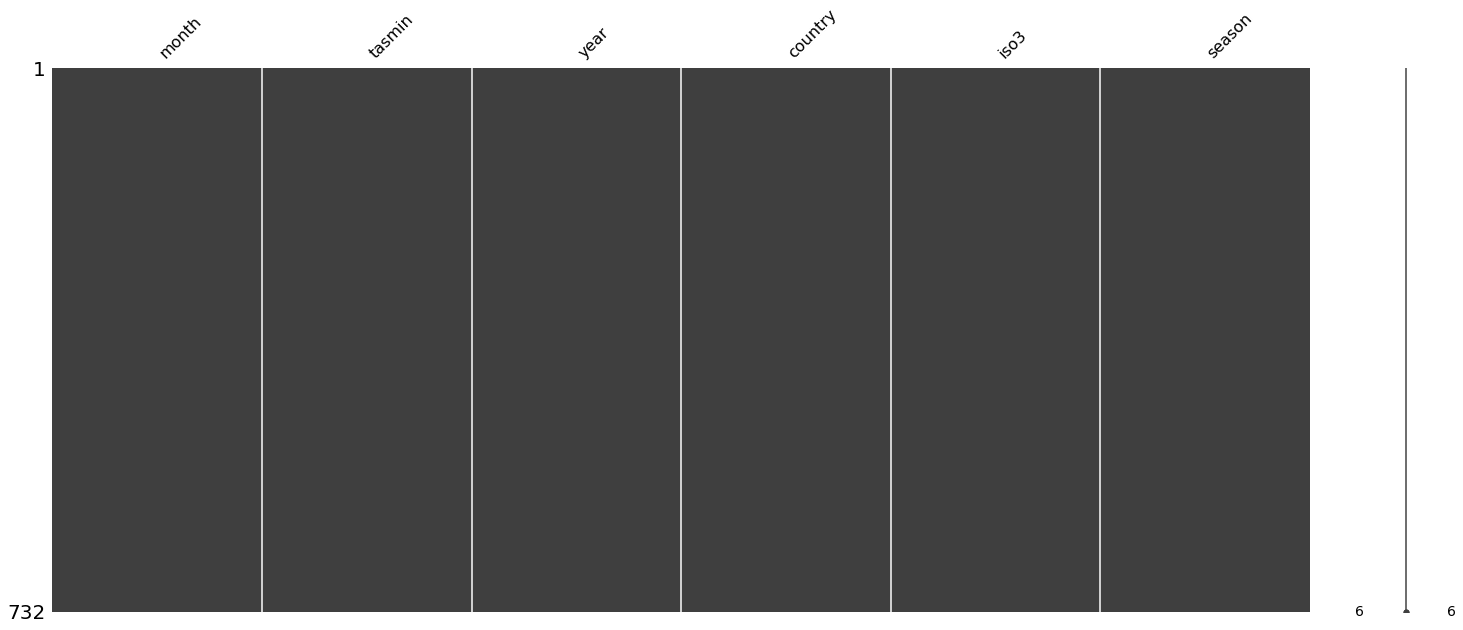

In [20]:
#Verifying NAN values
msno.matrix(df_tasmin_season)

In [21]:
df_tasmin_season.to_csv(f"/content/drive/MyDrive/Temperatura_Precipitacao_analises/limpos/tasmin_temperatura_min_avg/{tipo}{anos}{pais}_seasons.csv", index=False)

**Improving the memory usage**

---

In [22]:
#Verifying the shape
df_tasmin_season.shape


(732, 6)

In [23]:
#Verifying types and memory usage
original_info = df_tasmin_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    732 non-null    object 
 1   tasmin   732 non-null    float64
 2   year     732 non-null    int64  
 3   country  732 non-null    object 
 4   iso3     732 non-null    object 
 5   season   732 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 34.4+ KB


In [24]:
#Verifying memory usage
original_mem = df_tasmin_season.memory_usage(deep=True)


In [25]:
#Checking the low cardinality
df_tasmin_season.select_dtypes(include=["object"]).nunique()

month      12
country     1
iso3        1
season      4
dtype: int64

In [26]:
#Changing the columns types
col_to_category = ['month',"country","iso3","season"]

df_tasmin_season["year"]= df_tasmin_season["year"].astype("int32")
df_tasmin_season[col_to_category]=df_tasmin_season[col_to_category].astype("category")

df_tasmin_season

,month,tasmin,year,country,iso3,season
0,Jan,-33.0,1960,Russia,RUS,winter
1,Feb,-30.5,1960,Russia,RUS,winter
2,Mar,-26.1,1960,Russia,RUS,spring
3,Apr,-13.4,1960,Russia,RUS,spring
4,May,-3.4,1960,Russia,RUS,spring
...,...,...,...,...,...,...
727,Aug,7.6,2020,Russia,RUS,summer
728,Sep,3.1,2020,Russia,RUS,autumn
729,Oct,-5.9,2020,Russia,RUS,autumn
730,Nov,-15.1,2020,Russia,RUS,autumn


Comparing Memory Usage

In [27]:
#Verifying new memory usage
new_memory = df_tasmin_season.memory_usage(deep=True)


In [28]:
# Comparying memory usage
old_value ='\033[91m'
new_value ='\033[1;32m'
normal_value = '\033[0m'
print(old_value + "This is the original memory usage" + normal_value)
print(original_mem)
print(new_value + "\nAnd this is the new memory usage" + normal_value)
print(new_memory)


This is the original memory usage
Index        128
month      43920
tasmin      5856
year        5856
country    46116
iso3       43920
season     46116
dtype: int64

And this is the new memory usage
Index       128
month      1772
tasmin     5856
year       2928
country     875
iso3        872
season     1144
dtype: int64


In [29]:
#Checking new info data
new_info = df_tasmin_season.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   month    732 non-null    category
 1   tasmin   732 non-null    float64 
 2   year     732 non-null    int32   
 3   country  732 non-null    category
 4   iso3     732 non-null    category
 5   season   732 non-null    category
dtypes: category(4), float64(1), int32(1)
memory usage: 12.3 KB


In [30]:
#Checking the describe method
df_tasmin_season['tasmin'].describe().T

count    732.000000
mean     -10.649590
std       14.392873
min      -36.200000
25%      -24.800000
50%      -10.000000
75%        3.425000
max       10.700000
Name: tasmin, dtype: float64

*PLOTTING YEARS*

In [31]:
#Defining the df to chart
df_tasmin_season_chart =\
(
    df_tasmin_season.set_index("month")
)

df_tasmin_season_chart

,tasmin,year,country,iso3,season
month,,,,,
Jan,-33.0,1960,Russia,RUS,winter
Feb,-30.5,1960,Russia,RUS,winter
Mar,-26.1,1960,Russia,RUS,spring
Apr,-13.4,1960,Russia,RUS,spring
May,-3.4,1960,Russia,RUS,spring
...,...,...,...,...,...
Aug,7.6,2020,Russia,RUS,summer
Sep,3.1,2020,Russia,RUS,autumn
Oct,-5.9,2020,Russia,RUS,autumn


In [32]:
#Importing the package and defining the colors to plot
import matplotlib.dates as mdt
blue = '#99ddee'
white = '#ffffff'

In [33]:
#Defining the plot's function
def plot_year(ax,temp,years):
    ax.set_facecolor(blue)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    filtro_1 = df_tasmin_season_chart.year == y
    ax.plot(df_tasmin_season_chart.index[filtro_1],df_tasmin_season_chart.loc[filtro_1,'tasmin'].values)
    ax.tick_params(axis='x', colors=white)
    ax.tick_params(axis='y', colors=white)
    ax.set_ylabel('Celsius Min Temperature', color=white)
    ax.set_title(f"Year {y}", color=white, fontweight='bold')
    ax.fill_between(df_tasmin_season_chart.index,min(df_tasmin_season_chart['tasmin']), max(df_tasmin_season_chart['tasmin'])+5,  facecolor='white' )


In [34]:
df_tasmin_season_chart_x = df_tasmin_season_chart.reset_index()

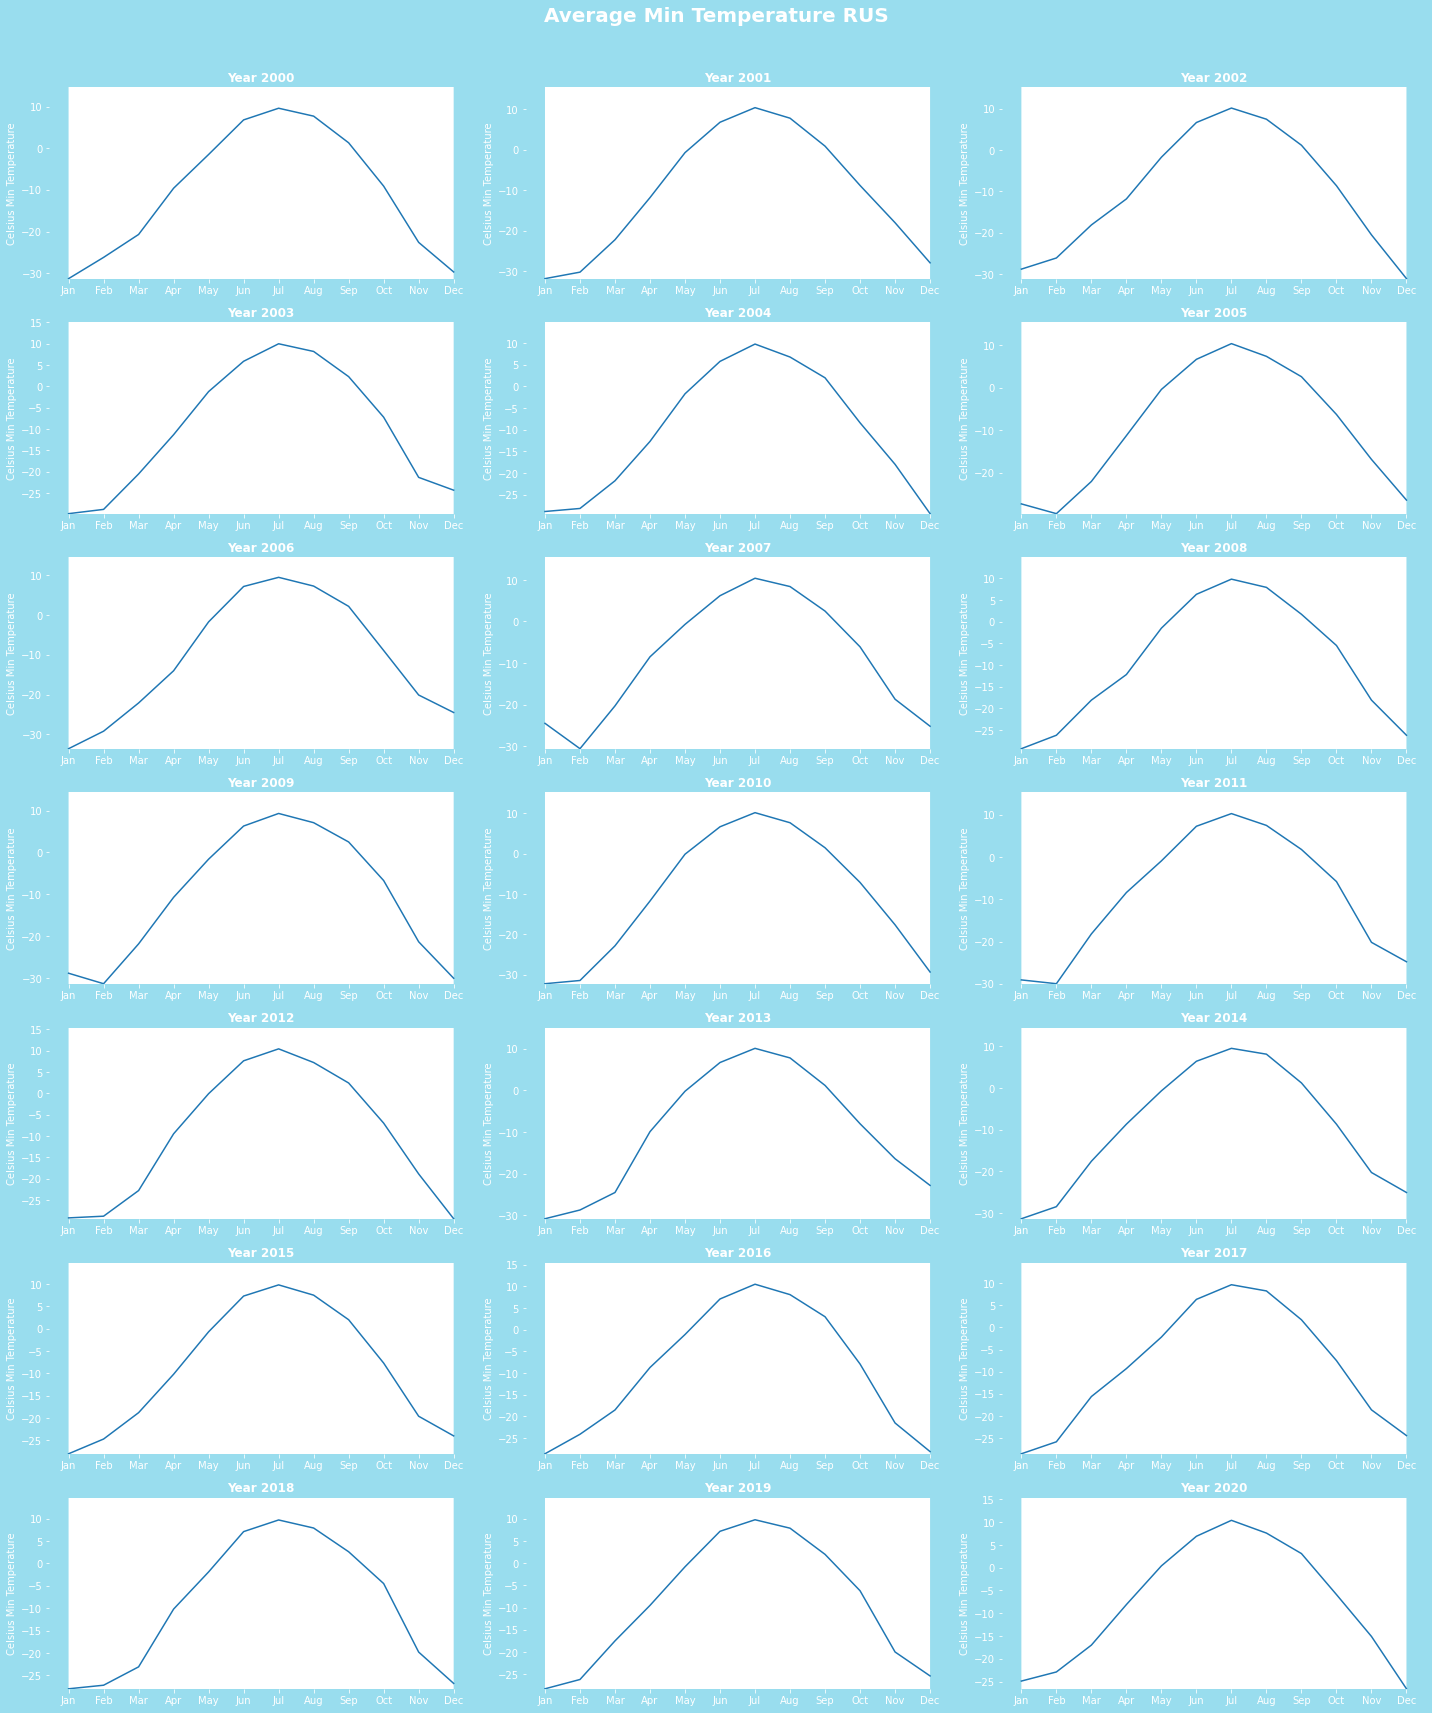

In [35]:
#Ploting the years
years = range(2000,2020+1)
fig, axs = plt.subplots(ncols =3, nrows = int(len(years)/3),figsize=(20,25), linewidth = 5, facecolor = blue)

axs = axs.flatten()
max_val = None
max_data = None
max_ax = None
for i, y in enumerate(years):

    ax= axs[i]
 
    data_1=\
    (
        df_tasmin_season_chart_x.assign(YEAR=pd.to_datetime(df_tasmin_season_chart_x.year))
        .set_index("year")
        .loc[y]
        .tasmin
        .interpolate()  
    )
 

    if max_val is None or max_val < data_1.max():
        max_val = data_1.max()
        max_data = data_1
        max_ax = ax

    ax.set_ylim(min(data_1.values), max((data_1.values))+5)
    years = {y}
    plot_year(ax, data_1, years)


fig.suptitle(f'Average Min Temperature {pais}', color='white', fontweight='bold',fontsize=20 )
fig.tight_layout( rect= [0,0.03, 1, 0.95])
fig.savefig(f'/content/drive/MyDrive/Temperatura_Precipitacao_analises/charts/tasmin_temperatura_min_media/Average Max Temperature by Year {pais}.png', dpi=300, facecolor=blue)



*PLOTTING QUARTILES*

In [36]:
#Defining data to Seasons' Quartile
temp_season = ['tasmin','season']
df_temp_season= df_tasmin_season[temp_season]


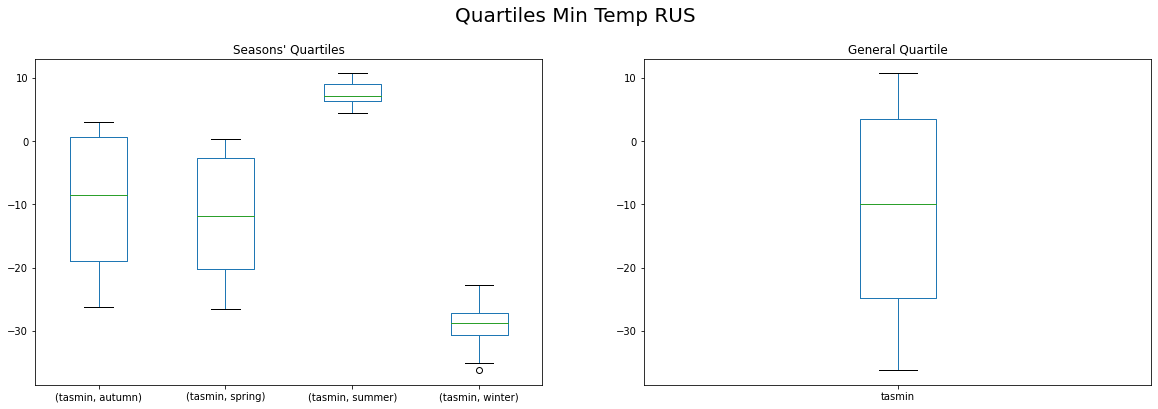

In [37]:
#Ploting Quartiles
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,6))
fig.suptitle(f"Quartiles Min Temp {pais}", size=20, y=1.00)
df_temp_season.pivot(columns='season').plot.box(ax=ax1,title="Seasons' Quartiles")
df_tasmin_season['tasmin'].plot.box(ax=ax2, title="General Quartile")
fig.savefig(f"/content/drive/MyDrive/Temperatura_Precipitacao_analises/charts/tasmin_temperatura_min_media/{pais} Seasons'Quartiles")

In [38]:
country=df_tasmin_season_chart.iloc[0,2]


In [39]:
iso3=df_tasmin_season_chart.iloc[0,3]


In [40]:
iso3

'RUS'

In [41]:
country

'Russia'

In [42]:
#Defining data to General Quartile
general_quartile= df_tasmin_season['tasmin'].describe()[['min','25%','50%','75%','max']].round(2).to_frame().assign(country=country).assign(iso3=iso3)
general_quartile

,tasmin,country,iso3
min,-36.20,Russia,RUS
25%,-24.80,Russia,RUS
50%,-10.00,Russia,RUS
75%,3.42,Russia,RUS
max,10.70,Russia,RUS


In [43]:
general_quartile.to_csv(f"/content/drive/MyDrive/Temperatura_Precipitacao_analises/notebooks/Quartiles/Temp_min_AVG/{pais}_General_Quartile.csv")

In [44]:
seasons_quartiles=\
(
    df_temp_season.pivot(columns='season')
    .describe()
    .loc[['min','25%','50%','75%',"max"]]
    .round(2)
    
    
)

#quartil_temp_seasons.columns=quartil_temp_seasons.columns.droplevel()
seasons_quartiles

tasmin                     
season autumn spring summer winter
min     -26.2  -26.6   4.40  -36.2
25%     -18.9  -20.3   6.30  -30.6
50%      -8.5  -11.8   7.20  -28.8
75%       0.7   -2.7   9.05  -27.2
max       3.1    0.4  10.70  -22.8

In [45]:
seasons_quartiles.columns=\
(
    seasons_quartiles.columns.droplevel().add_categories(['country','iso3'])
       
)
seasons_quartiles=seasons_quartiles.assign(country=country).assign(iso3=iso3)
seasons_quartiles.index.name='quartil'
seasons_quartiles

season,autumn,spring,summer,winter,country,iso3
quartil,,,,,,
min,-26.2,-26.6,4.40,-36.2,Russia,RUS
25%,-18.9,-20.3,6.30,-30.6,Russia,RUS
50%,-8.5,-11.8,7.20,-28.8,Russia,RUS
75%,0.7,-2.7,9.05,-27.2,Russia,RUS
max,3.1,0.4,10.70,-22.8,Russia,RUS


In [46]:
seasons_quartiles.to_csv(f"/content/drive/MyDrive/Temperatura_Precipitacao_analises/notebooks/Quartiles/Temp_min_AVG/{pais}_Seasons_Quartiles_Min_Temp.csv")